# EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py




import pkgutil
import encodings
import os
from datetime import datetime
from dateutil import parser
import geocoder
import sys
import folium
!pip install squarify
import squarify
import branca
import io
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud




###  Import the dataset

In [3]:

with open('Accidentalidad.csv', 'r', newline='', encoding='ISO-8859-1') as csvfile:

    df = pd.read_csv("Accidentalidad.csv", sep = ';')


In [4]:
     
#vamos a eliminar las tres ultimas columnas
df.columns
df2 = df.drop(['Unnamed: 13', 'Unnamed: 14', "NÚMERO"], axis=1)
df2.head()

,Nº EXPEDIENTE,FECHA,HORA,CALLE,DISTRITO,TIPO ACCIDENTE,ESTADO METEREOLÓGICO,Otros vehículos con motor,TIPO PERSONA,RANGO DE EDAD,SEXO,LESIVIDAD*
0,2020S000057,01/01/2020,23:15,AVDA. CIUDAD DE BARCELONA / CALL. DOCTOR ESQUERDO,RETIRO,Choque contra obstáculo fijo,Despejado,Turismo,Conductor,DE 25 A 29 AÑOS,Hombre,NaN
1,2020S000038,01/01/2020,22:35,CALL. VALLE DE TORANZO / CALL. SIERRA DE PAJAREJO,MONCLOA-ARAVACA,Caída,Despejado,Ciclomotor,Conductor,DE 21 A 24 AÑOS,Mujer,6.0
2,2020S000060,01/01/2020,20:15,GTA. MARIANO SALVADOR MAELLA,FUENCARRAL-EL PARDO,Caída,Despejado,Turismo,Conductor,DE 45 A 49 AÑOS,Hombre,14.0
3,2020S000060,01/01/2020,20:15,GTA. MARIANO SALVADOR MAELLA,FUENCARRAL-EL PARDO,Caída,Despejado,Motocicleta hasta 125cc,Conductor,DE 25 A 29 AÑOS,Hombre,7.0
4,2020S000033,01/01/2020,19:45,CALL. OLIVAR,CENTRO,Choque contra obstáculo fijo,Despejado,Turismo,Conductor,DESCONOCIDA,NaN,NaN


In [5]:
df3= df2.dropna()

In [6]:
# tengo que cambiar a formato fecha para poder trabajar con los datos que tengo
df3["FECHA"] = pd.to_datetime(df3["FECHA"])
df3["MES"]=df3['FECHA'].dt.month

<ipython-input-6-7c98cf0b7d85>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-6-7c98cf0b7d85>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



NameError: name 'df3' is not defined

In [7]:
df3.groupby(['RANGO DE EDAD']).groups.keys() #los rangos de edad que hay en este dataset

dict_keys(['DE 0 A 5 AÑOS', 'DE 10 A 14 AÑOS', 'DE 15 A 17 AÑOS', 'DE 18 A 20 AÑOS', 'DE 21 A 24 AÑOS', 'DE 25 A 29 AÑOS', 'DE 30 A 34 AÑOS', 'DE 35 A 39 AÑOS', 'DE 40 A 44 AÑOS', 'DE 45 A 49 AÑOS', 'DE 50 A 54 AÑOS', 'DE 55 A 59 AÑOS', 'DE 6 A 9 AÑOS', 'DE 60 A 64 AÑOS', 'DE 65 A 69 AÑOS', 'DE 70 A 74 AÑOS', 'DESCONOCIDA', 'MAYOR DE 74 AÑOS'])

In [8]:
df3.groupby(['TIPO ACCIDENTE']).groups.keys() # se visualiza la tipologia del accidente 

dict_keys(['Alcance', 'Atropello a animal', 'Atropello a persona', 'Caída', 'Choque contra obstáculo fijo', 'Colisión frontal', 'Colisión fronto-lateral', 'Colisión lateral', 'Colisión múltiple', 'Despeñamiento', 'Otro', 'Solo salida de la vía', 'Vuelco'])

In [10]:
dist_agrupa= df3.groupby(['DISTRITO']) #Agrupamos los distritos

pd.unique(df3['DISTRITO']) #veo que distritos diferentes tengo en la columna de distritos
dist_numero = new_df.groupby(("DISTRITO")).columns_1.count()
barrios=pd.DataFrame({'distrito':dist_numero.index, 'accidentes':dist_numero.values})

NameError: name 'new_df' is not defined

In [163]:
new_df=df3.assign(columns_1=1) #inserto unacolumna de unos



In [164]:
sex_numero = new_df.groupby(("SEXO")).columns_1.count() #agrupación de la columna sexo con la de unos 
sexo =pd.DataFrame({'Hombres/Mujeres':sex_numero.index, 'Cantidad':sex_numero.values})
print(sexo)

  Hombres/Mujeres  Cantidad
0          Hombre     11578
1           Mujer      5571


In [165]:
condi= new_df.groupby(["ESTADO METEREOLÓGICO"]) #Agrupamos las diferentes condiciones meteorologicas

pd.unique(new_df["ESTADO METEREOLÓGICO"]) #veo que condiciones meteologicas tengo en la columna de estado meteorologico
cond_met = new_df.groupby(("ESTADO METEREOLÓGICO")).columns_1.count()
meto=pd.DataFrame({"Estado Meteologico":cond_met.index, 'Número de accidentes':cond_met.values})


In [166]:

vehiculo= df3.groupby(['Otros vehículos con motor']).groups.keys() #Agrupamos los diferentes tipos de vehículos presentes



pd.unique(df3['Otros vehículos con motor']) 



array(['Ciclomotor', 'Turismo', 'Motocicleta hasta 125cc', 'Furgoneta',
       'Motocicleta > 125cc', 'Todo terreno', 'Otros vehículos con motor',
       'Autobús', 'Camión rígido', 'Bicicleta', 'Tractocamión',
       'VMU eléctrico', 'Autobus EMT', 'Maquinaria de obras',
       'Vehículo articulado', 'Bicicleta EPAC (pedaleo asistido)',
       'Ciclo', 'Cuadriciclo ligero', 'Autobús articulado',
       'Otros vehículos sin motor', 'Moto de tres ruedas > 125cc',
       'Cuadriciclo no ligero', 'Patinete', 'Ambulancia SAMUR',
       'Sin especificar', 'Moto de tres ruedas hasta 125cc',
       'Autocaravana', 'Ciclomotor de dos ruedas L1e-B',
       'Autobús articulado EMT', 'Maquinaria agrícola',
       'Camión de bomberos', 'Ciclomotor de tres ruedas'], dtype=object)

In [167]:

cond_agru= df3.groupby(['TIPO PERSONA']) # agrupo el tipo de persona con la cantidad de accidentes
conduct = new_df.groupby(("TIPO PERSONA")).columns_1.count()
conductor=pd.DataFrame({'Tipología Persona':conduct.index, 'numero':conduct.values})



In [168]:
#edad= df3.groupby(['RANGO DE EDAD']) # veo los intervalos de edad presentes en la columna Rango de edad y veo que son cada cuatro años 
anios = new_df.groupby(("RANGO DE EDAD")).columns_1.count()
#edades=pd.DataFrame({'Rango de edad':anios.index, 'numero':anios.values})
pd.unique(new_df['RANGO DE EDAD'])

array(['DE 21 A 24 AÑOS', 'DE 45 A 49 AÑOS', 'DE 25 A 29 AÑOS',
       'DE 55 A 59 AÑOS', 'DE 18 A 20 AÑOS', 'DE 35 A 39 AÑOS',
       'DE 40 A 44 AÑOS', 'DE 50 A 54 AÑOS', 'DE 30 A 34 AÑOS',
       'DE 60 A 64 AÑOS', 'DE 65 A 69 AÑOS', 'DESCONOCIDA',
       'DE 70 A 74 AÑOS', 'MAYOR DE 74 AÑOS', 'DE 0 A 5 AÑOS',
       'DE 6 A 9 AÑOS', 'DE 10 A 14 AÑOS', 'DE 15 A 17 AÑOS'],
      dtype=object)

In [169]:
def dianoche(HORA): # formula que me permite a partir de las horas que se producen los accidentes, distinguir solamente entre noche y día
    if ('0:00' < HORA> '7:59'):
            return "NOCHE"
    else:
        return "DÍA"
new_df["DIA"] = new_df["HORA"].apply(dianoche) #nueva columna que se llama DIA

diur2 = new_df.groupby("DIA").columns_1.count()
noche=pd.DataFrame({'DÍA O NOCHE':diur2.index, 'ACCIDENTES':diur2.values})

In [170]:
 #agrupo  los meses y  la cantidad de accidentes
meses_agru = new_df.groupby(("MES")).columns_1.count()
tot_meses=pd.DataFrame({'Meses':meses_agru.index, 'numero accidentes':meses_agru.values})



In [172]:
def edad(RANGO): # formula que me permite resumir los rangos de edades, he puesto solamente 4 grupos de adad
    if RANGO == "DE 0 A 5 AÑOS" or RANGO =="DE 6 A 9 AÑOS" or RANGO =="DE 10 A 14 AÑOS" or RANGO == "DE 15 A 17 AÑOS" or RANGO == "DE 18 A 20 AÑOS":
            return "Niño"
    elif RANGO  == "DE 21 A 24 AÑOS" or RANGO  == "DE 25 A 29 AÑOS" or RANGO == "DE 30 A 34 AÑOS":
        return "Joven"
    elif RANGO == "DE d35 A 39 AÑOS" or RANGO == "DE 40 A 44 AÑOS" or RANGO  == "DE 45 A 49 AÑOS" or RANGO == "DE 50 A 54 AÑOS" or RANGO== "DE 55 A 59 AÑOS" or RANGO== "DE 60 A 64 AÑOS":
        return "Mediana edad"
    elif RANGO == "DE 65 A 69 AÑOS" or RANGO == "DE 70 A 74 AÑOS" or RANGO  == "MAYOR DE 74 AÑOS" or RANGO  == "DESCONOCIDA":
        return "Tercera Edad"
    else:
        return
   
    
new_df["EDADES"] = new_df["RANGO DE EDAD"].apply(edad)    

edad = new_df.groupby(("EDADES")).columns_1.count()
edad_tot=pd.DataFrame({"EDADES":edad.index, "Número de accidentes":edad.values})


In [173]:

#mask_coches = new_df['TIPO VEHÍCULO'].str.contains("Turismo|Todo terreno")

#mask_moto = new_df['TIPO VEHÍCULO'].str.contains('Ciclomotor|Motocicleta hasta 125cc|Motocicleta > 125cc|Ciclo|Moto de tres ruedas > 125cc|Moto de tres ruedas hasta 125cc|Ciclomotor de dos ruedas L1e-B|Ciclomotor de tres ruedas') #Agrupamos los diferentes tipos de vehículos presentes
#mask_furgoneta = new_df['TIPO VEHÍCULO'].str.contains("Furgoneta|Autocaravana")
#mask_bus= new_df['TIPO VEHÍCULO'].str.contains("Autobús|Autobus EMT|Autobús articulado|Autobús articulado EMT")
#mask_bici =new_df['TIPO VEHÍCULO'].str.contains("Bicicleta|VMU eléctrico|Bicicleta EPAC (pedaleo asistido)|Otros vehículos sin motor|Patinete")
#mask_otros= new_df['TIPO VEHÍCULO'].str.contains("Otros vehículos con motor|Camión rígido|Tractocamión|Maquinaria de obras|Vehículo articulado|Cuadriciclo no ligero|Cuadriciclo ligero|Ambulancia SAMUR|Sin especificar|Maquinaria agrícola|Camión de bomberos")

def cambio(VEHÍCULO): # había unos 30 tipos de vehículos, con esta fórmula los reduzco a 6
    if VEHÍCULO == "Turismo" or VEHÍCULO =="Todo terreno":
            return "Coche"
    elif VEHÍCULO == "Furgoneta" or VEHÍCULO == "Autocaravana":
        return "Furgoneta"
    elif VEHÍCULO == "Ciclomotor" or VEHÍCULO == "Motocicleta hasta 125cc"or VEHÍCULO == "Motocicleta > 125cc" or VEHÍCULO =="Ciclo" or VEHÍCULO =="Moto de tres ruedas > 125cc" or VEHÍCULO ==" Moto de tres ruedas hasta 125cc" or VEHÍCULO == "Ciclomotor de dos ruedas L1e-B" or VEHÍCULO == "Ciclomotor de tres ruedas":
        return "Motocicleta"
    elif VEHÍCULO == "Autobús" or VEHÍCULO == "Autobus EMT" or VEHÍCULO == "Autobús articulado" or VEHÍCULO == "Autobús articulado EMT":
        return "Autobus"
    elif VEHÍCULO =="Bicicleta" or VEHÍCULO == "VMU eléctrico" or VEHÍCULO =="Bicicleta EPAC (pedaleo asistido)" or VEHÍCULO =="Otros vehículos sin motor" or VEHÍCULO =="Patinete":
        return "Bicicleta"
    elif VEHÍCULO == "Otros vehículos con motor" or VEHÍCULO == "Camión rígido" or VEHÍCULO == "Tractocamión" or VEHÍCULO == "Maquinaria de obras" or VEHÍCULO =="Vehículo articulado" or VEHÍCULO == "Cuadriciclo no ligero" or VEHÍCULO =="Cuadriciclo ligero" or VEHÍCULO =="Ambulancia SAMUR" or VEHÍCULO == "Sin especificar" or VEHÍCULO =="Maquinaria agrícola" or VEHÍCULO =="Camión de bomberos":
        return "Otros vehículos"
    
    else:
        return  
new_df["VEHÍCULOS"] = new_df["Otros vehículos con motor"].apply(cambio)    


        
vehi = new_df.groupby(("VEHÍCULOS")).columns_1.count()
vehic=pd.DataFrame({'VEHÍCULOS':vehi.index, 'Número de accidentes':vehi.values})



In [174]:
tipo = new_df.groupby(("TIPO ACCIDENTE")).columns_1.count() # agrupo los tipos de accidentes para ver la cantidad de los mismos
tipoc=pd.DataFrame({'TIPO ACCIDENTE':tipo.index, 'Cantidad':tipo.values})

In [175]:
dist_numero = new_df.groupby(("DISTRITO")).columns_1.count()
barrios=pd.DataFrame({'DISTRITO':dist_numero.index, 'accidentes':dist_numero.values})

In [176]:
# incluyo este excel en el que está la longitud, latitud y nombre de todos los distritos de Madrid
dfb = pd.read_csv('prueba2.csv', sep=",", encoding='ISO-8859-1')
dfb.dtypes

#print(dfb['LONGITUD'])
#dfb.head()

dfb["LONGITUD"]=dfb["LONGITUD"].astype('float')
#print(dfb["LONGITUD"])
#dfb["LATITUD"]=dfb["LATITUD"].astype('float32')
#print(dfb["LATITUD"])
#dfb["Porcentaje"]=dfb["Porcentaje"].astype('float32')
#print(dfb["Porcentaje"])
#dfb["LONGITUD"] = pd.to_numeric(dfb["LONGITUD"], errors='coerce')
#dfb["LATITUD"] = pd.to_numeric(dfb["LATITUD"], errors='coerce')
#dfb["LATITUD"] = dfb['LATITUD'].astype(np.float)
dfb["Porcentaje"]=dfb["Porcentaje"].astype('int')


In [177]:

df4 = new_df.drop(new_df.columns[[0]],axis='columns')  
df5 = df4.drop (['FECHA','CALLE', 'LESIVIDAD*', 'HORA', 'Otros vehículos con motor', 'RANGO DE EDAD'], axis=1)
df5.head()   
#he eliminado las columnas siguientes: fecha, calle, Lsividad, hora, otros vehículos con motor y rango de edad



,DISTRITO,TIPO ACCIDENTE,ESTADO METEREOLÓGICO,TIPO PERSONA,SEXO,MES,columns_1,DIA,EDADES,VEHÍCULOS
1,MONCLOA-ARAVACA,Caída,Despejado,Conductor,Mujer,1,1,DÍA,Joven,Motocicleta
2,FUENCARRAL-EL PARDO,Caída,Despejado,Conductor,Hombre,1,1,DÍA,Mediana edad,Coche
3,FUENCARRAL-EL PARDO,Caída,Despejado,Conductor,Hombre,1,1,DÍA,Joven,Motocicleta
6,CARABANCHEL,Colisión fronto-lateral,Despejado,Conductor,Mujer,1,1,DÍA,Joven,Motocicleta
7,CHAMARTÍN,Atropello a persona,Despejado,Conductor,Hombre,1,1,DÍA,Mediana edad,Coche


In [179]:

#https://www.pluralsight.com/guides/map-visualizations-in-python-using-folium

# Make an empty map
mi_mapa = folium.Map(location=[40.4167,-3.70325], zoom_start=13)

for i in range(0,len(dfb)):
    valor = int(dfb.iloc[i]["Porcentaje"])
    if valor > 5:
             col = "Red"
    else:
             col = "green"
    folium.Circle(
      location=[dfb.iloc[i]["LONGITUD"], dfb.iloc[i]["LATITUD"]],
      popup=dfb.iloc[i]["DISTRITOS"],
      radius = valor*120,
      color=col,
      fill=True,
      fill_color=col
   ).add_to(mi_mapa)

mi_mapa.save("DISTRITOSmap.html")

       
       

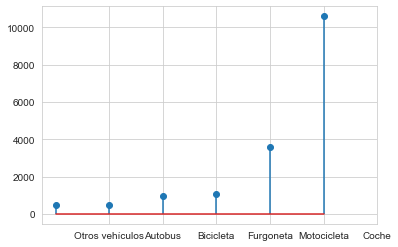

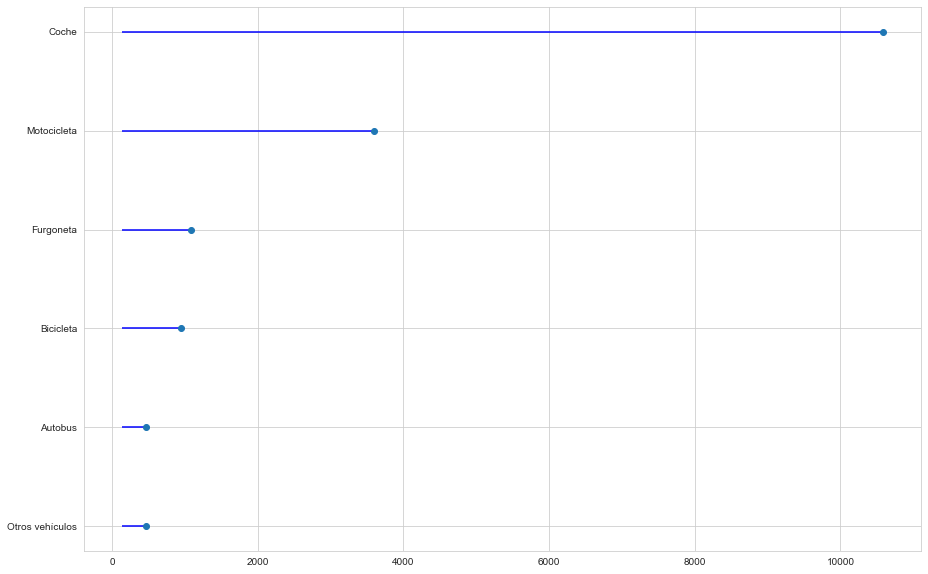

In [180]:
# Hago dos graficas de piruleta


vehi = new_df.groupby(("VEHÍCULOS")).columns_1.count()
# Reorder it following the values:
ordered_vehic = vehic.sort_values("Número de accidentes")
my_range=range(1,len(vehic.index)+1)

# Make the plot
plt.stem(ordered_vehic["Número de accidentes"])
plt.xticks( my_range, ordered_vehic['VEHÍCULOS'])



vehi= new_df["VEHÍCULOS"].value_counts(ascending=True)
plt.figure(figsize=(15,10))
plt.hlines(y=vehi.index,
           xmin=140,
           xmax=vehi,
           color='blue',
           linestyle= "solid")
            
plt.plot(vehi, vehi.index, "o");




C:\Users\Data Science\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Número de accidentes'>

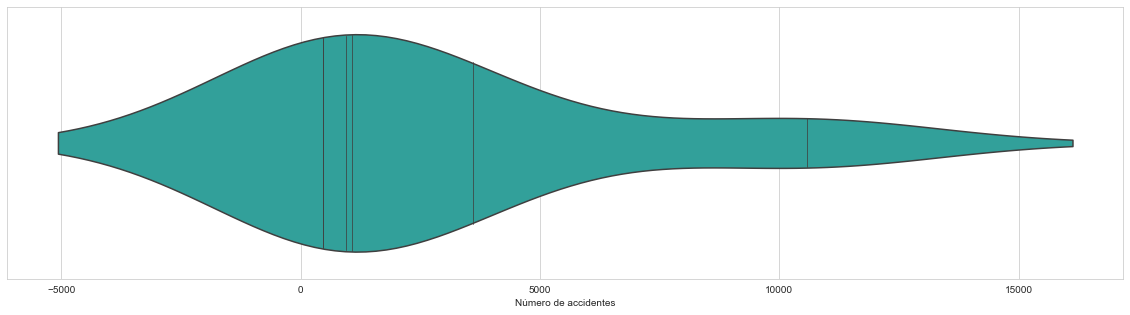

In [181]:


# plot

plt.figure(figsize=(20,5))
sns.violinplot(vehic["Número de accidentes"], color = "lightseagreen", inner = "stick")





C:\Users\Data Science\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Cantidad'>

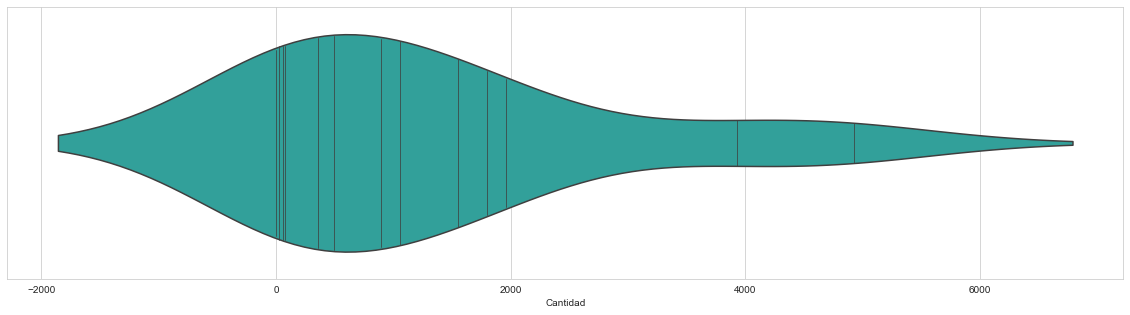

In [182]:
plt.figure(figsize=(20,5))
sns.violinplot(tipoc["Cantidad"], color = "lightseagreen", inner = "stick")

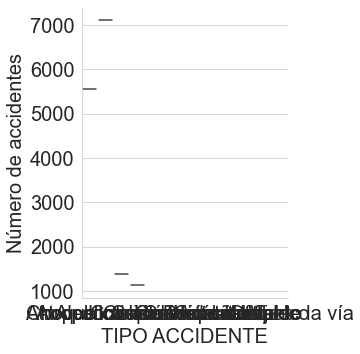

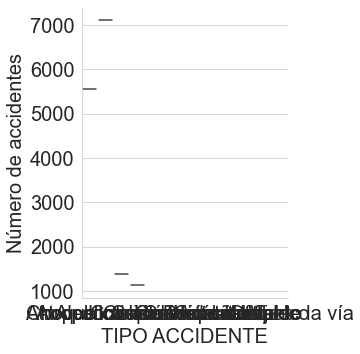

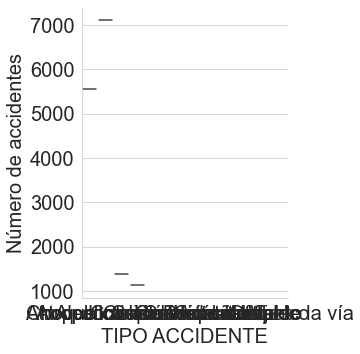

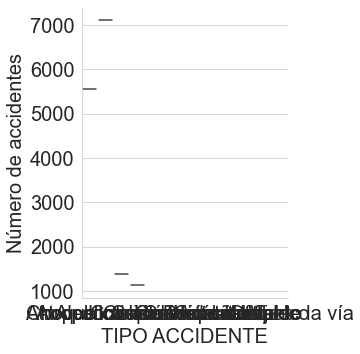

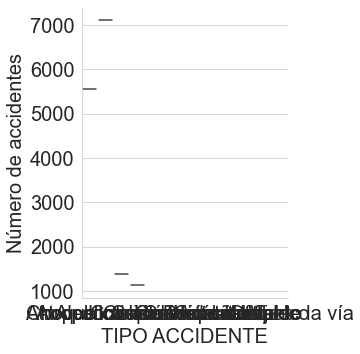

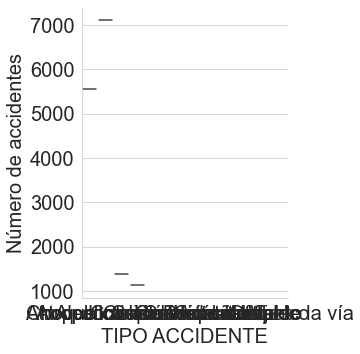

In [269]:

for item in fig.get_xticklabels():
    item.set_rotation(40)
    sns.catplot(x=tipoc['TIPO ACCIDENTE'], y=edad_tot["Número de accidentes"], kind="violin", data=new_df);
edad = new_df.groupby(("EDADES")).columns_1.count()
edad_tot=pd.DataFrame({"EDADES":edad.index, "Número de accidentes":edad.values})    


tipo = new_df.groupby(("TIPO ACCIDENTE")).columns_1.count()
tipoc=pd.DataFrame({'TIPO ACCIDENTE':tipo.index, 'Cantidad':tipo.values})

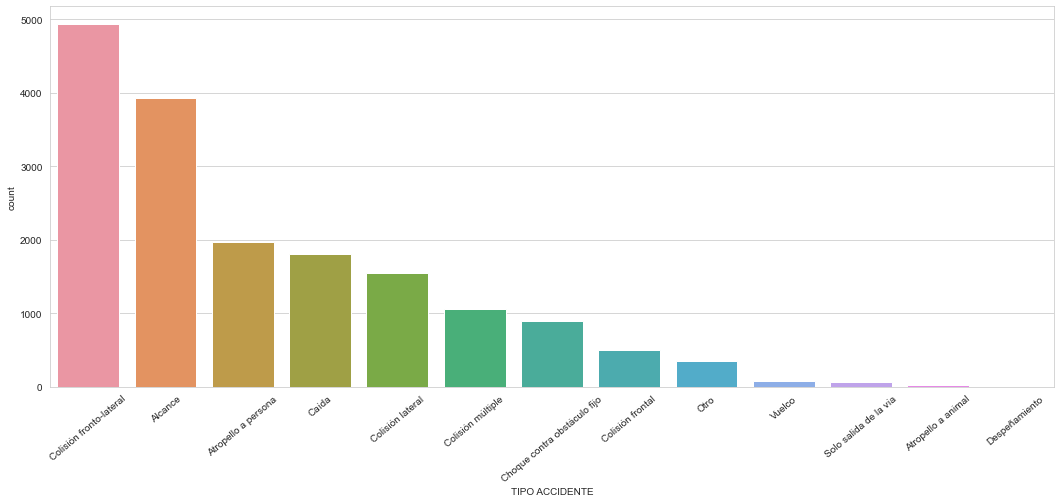

In [184]:
#gráfico de barras, con el tipo de accidente y sus cantidades
fig, ax = plt.subplots(figsize=(18,7))
fig = sns.countplot(x = df3['TIPO ACCIDENTE'], ax=ax, order = df3['TIPO ACCIDENTE'].value_counts().index) 
for item in fig.get_xticklabels():
    item.set_rotation(40)

In [185]:
#con esta tabla se puede ver el cruce entre el tipo de accidente y el tipo de vehículo
pd.crosstab(new_df['TIPO ACCIDENTE'],
           new_df['VEHÍCULOS'],
           margins=False)

VEHÍCULOS,Autobus,Bicicleta,Coche,Furgoneta,Motocicleta,Otros vehículos
TIPO ACCIDENTE,,,,,,
Alcance,63,79,2875,262,574,74
Atropello a animal,0,4,13,3,2,2
Atropello a persona,52,111,1350,172,203,76
Caída,86,393,194,18,1089,20
Choque contra obstáculo fijo,10,23,664,67,91,39
Colisión frontal,10,32,332,31,80,12
Colisión fronto-lateral,150,214,3119,306,1017,122
Colisión lateral,32,66,882,92,414,69
Colisión múltiple,6,2,867,105,55,26


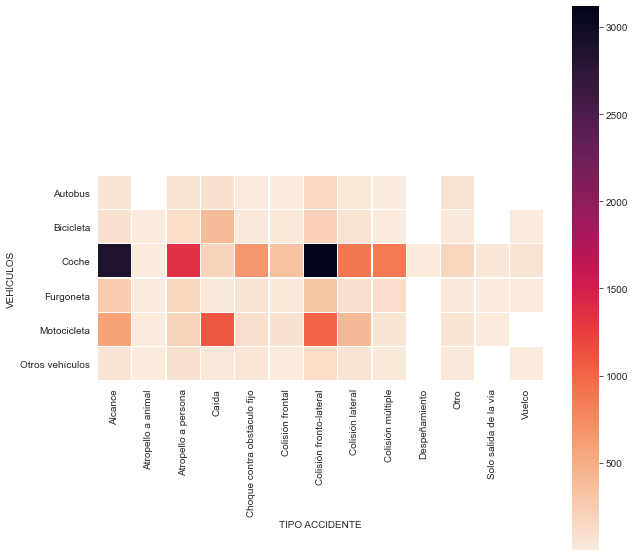

In [186]:
# un mapaa de calor entre vehículos y tipo de accidente
data = new_df.groupby(['VEHÍCULOS', 'TIPO ACCIDENTE']).sum()['columns_1'].unstack() #unstack par quitar el indice jerarquico

sns.color_palette("mako", as_cmap=True)
plt.figure(figsize=(10,10))
sns.heatmap(data,
            square=True,
            linewidths=.3, cmap = sns.cm.rocket_r);

In [187]:
#un cruce entre distritos y vehículos
pd.crosstab(new_df['DISTRITO'],
           new_df['VEHÍCULOS'],
           margins=False)


VEHÍCULOS,Autobus,Bicicleta,Coche,Furgoneta,Motocicleta,Otros vehículos
DISTRITO,,,,,,
ARGANZUELA,46,71,462,60,207,27
BARAJAS,6,14,178,12,30,5
CARABANCHEL,21,43,713,92,153,36
CENTRO,51,85,349,53,300,19
CHAMARTÍN,36,38,746,75,280,42
CHAMBERÍ,11,55,373,39,314,18
CIUDAD LINEAL,24,27,665,64,226,28
FUENCARRAL-EL PARDO,30,53,599,40,174,19
HORTALEZA,3,72,542,52,127,20


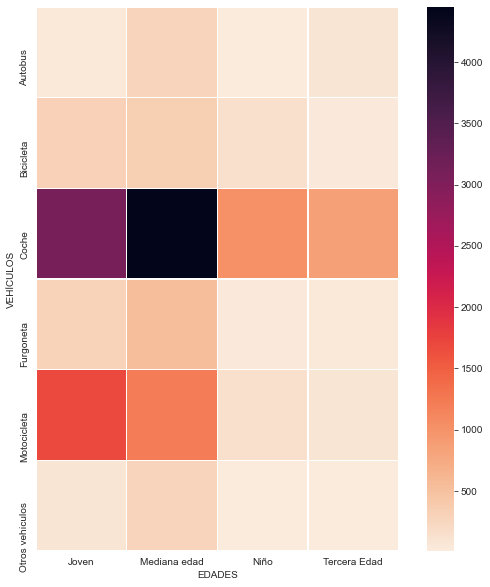

In [188]:
# un mapa de calor entre edades y vehículos
data = new_df.groupby(['VEHÍCULOS', 'EDADES']).sum()['columns_1'].unstack() #unstack par quitar el indice jerarquico

sns.color_palette("mako", as_cmap=True)
plt.figure(figsize=(10,10))
sns.heatmap(data,
            square=True,
            linewidths=.3, cmap = sns.cm.rocket_r);


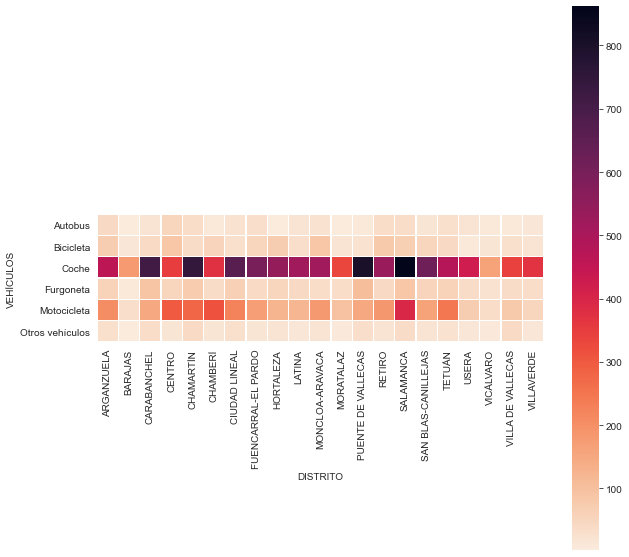

In [213]:
# otro mapa de calor, esta vez entre vehículos y distrito

data = new_df.groupby(["VEHÍCULOS", 'DISTRITO']).sum()['columns_1'].unstack() #unstack par quitar el indice jerarquico

sns.color_palette("mako", as_cmap=True)
plt.figure(figsize=(10,10))
sns.heatmap(data,
            square=True,
            linewidths=.3, cmap = sns.cm.rocket_r);

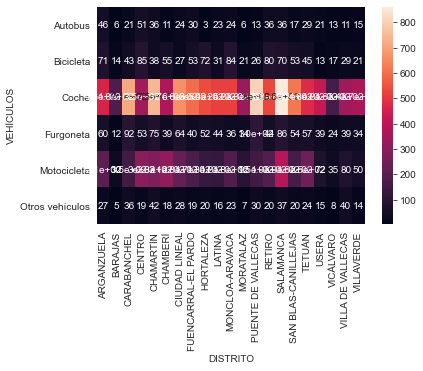

In [190]:
# una prueba de mapa de calor con los datos por dentro (no se ve nada)
heat_map = sns.heatmap(data, annot=True)
plt.show()


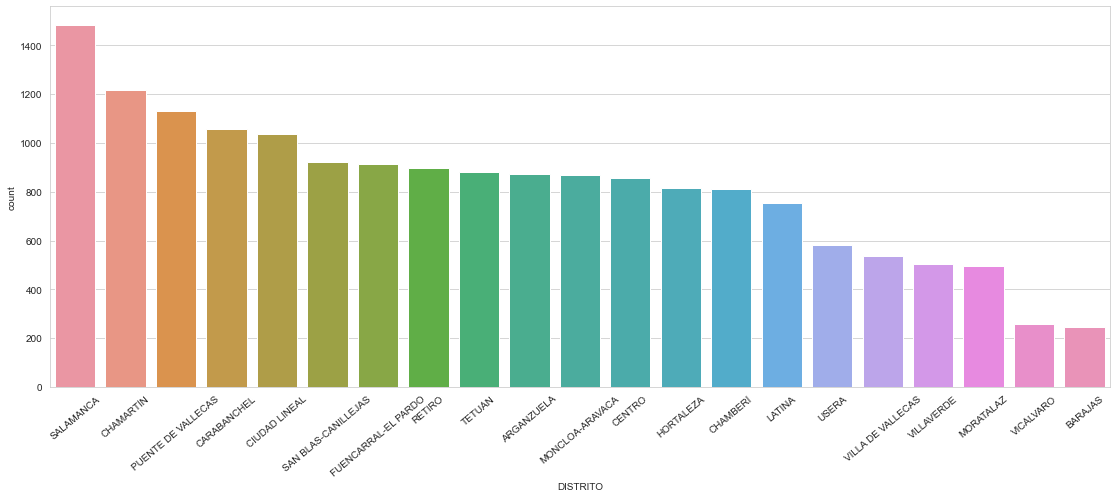

In [191]:
# gráfica de barras, entre distrito y los accidentes ocurridos
fig, ax = plt.subplots(figsize=(19,7))
fig = sns.countplot(x = new_df['DISTRITO'], ax=ax, order = new_df['DISTRITO'].value_counts().index)
#plt.setp(fig.get_xticklabels(), rotation=45)
for item in fig.get_xticklabels():
    item.set_rotation(40)



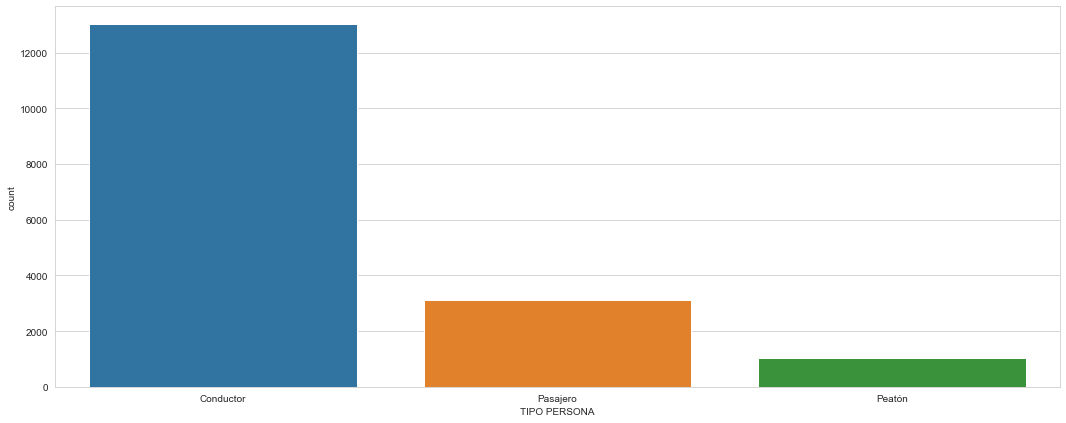

In [192]:
#gráfica de tipo de persona, se distinguen peatón, pasajero y conductor
fig, ax = plt.subplots(figsize=(18,7))
fig2 = sns.countplot(x = new_df['TIPO PERSONA'], ax=ax, order = new_df['TIPO PERSONA'].value_counts().index)



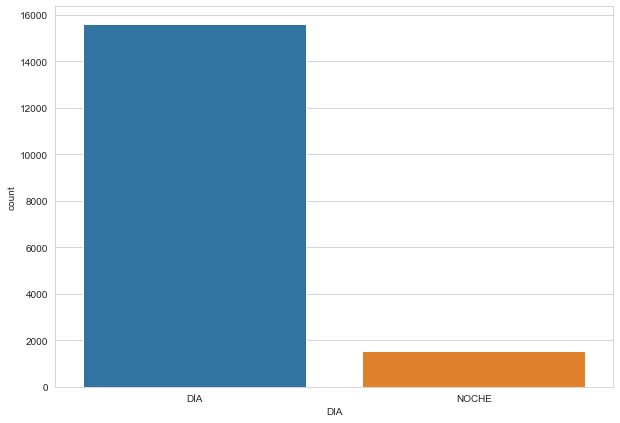

In [207]:
#gráfica de ocurrencia en la que se ve los accidentes producidos en el día o en la noche
fig, ax = plt.subplots(figsize=(10,7))
fig2 = sns.countplot(x = new_df['DIA'], ax=ax, order = new_df['DIA'].value_counts().index)

C:\Users\Data Science\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



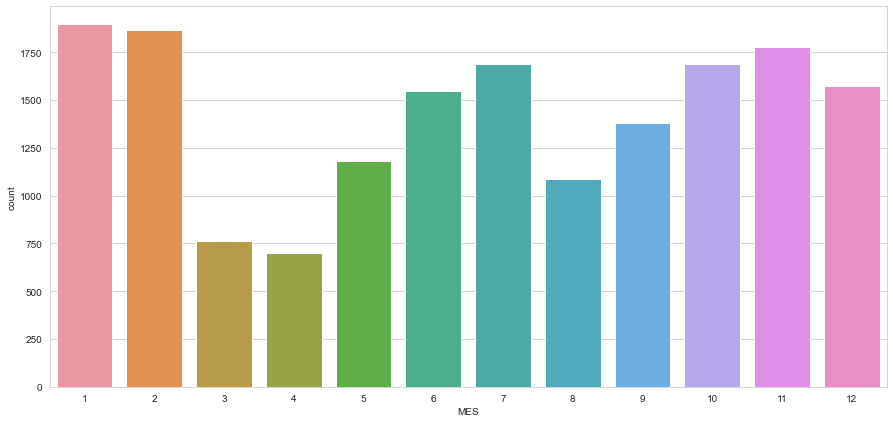

In [194]:
#diagrama de barras con los meses
plt.figure(figsize=(15,7))
sns.countplot(new_df["MES"]);


C:\Users\Data Science\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='SEXO', ylabel='count'>

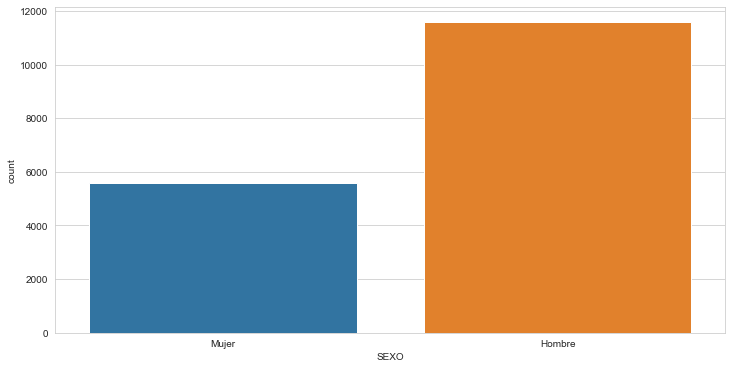

In [222]:
#aqui se visualiza la ocurencia de accidentes entre mujeres y hombres
plt.figure(figsize=(12,6))
sns.countplot(new_df["SEXO"])


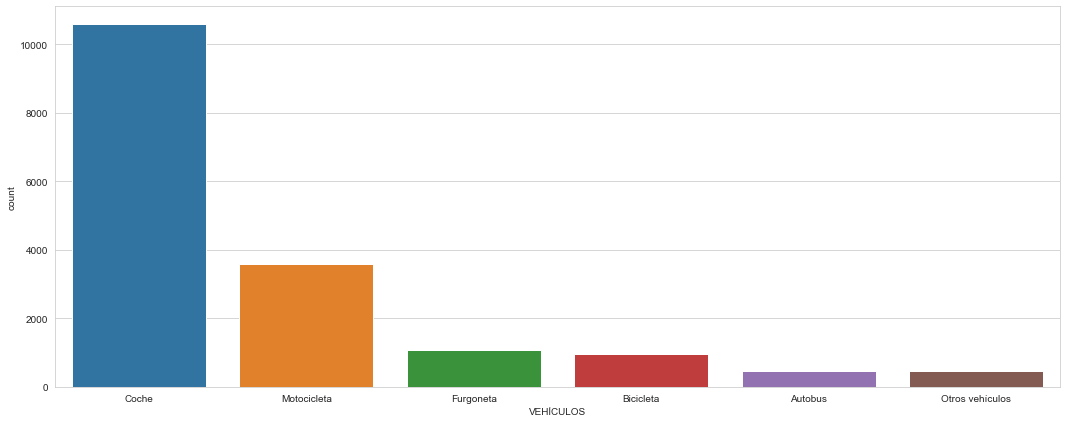

In [216]:
# tipos de vehiculos involucrados en accidentes
fig, ax = plt.subplots(figsize=(18,7))
fig = sns.countplot(x = new_df['VEHÍCULOS'], ax=ax, order = new_df['VEHÍCULOS'].value_counts().index)


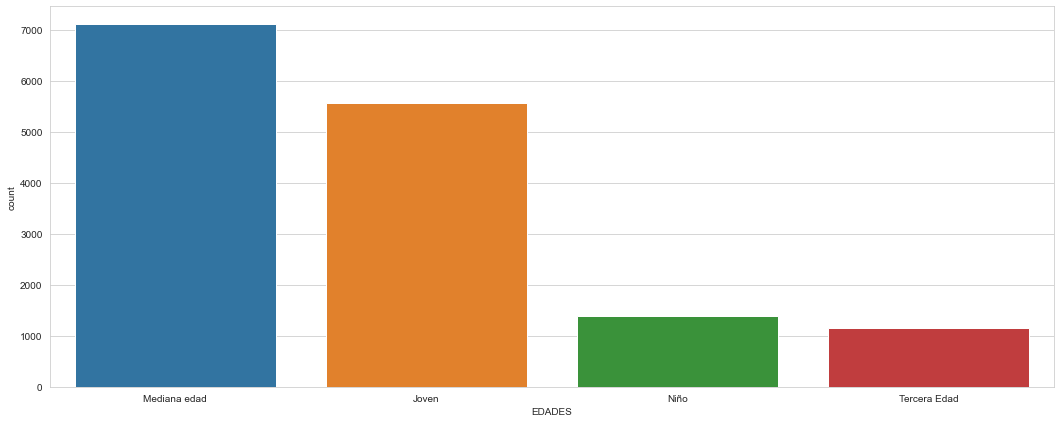

In [197]:
#RANGO DE EDAD

fig, ax = plt.subplots(figsize=(18,7))
fig = sns.countplot(x = new_df['EDADES'], ax=ax, order = new_df['EDADES'].value_counts().index)





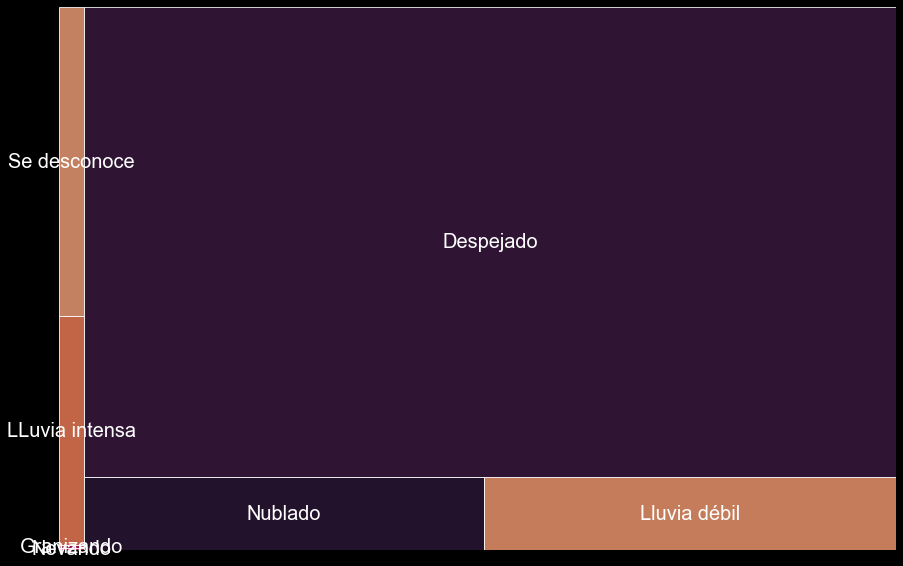

In [267]:
#ESTADO METEOROLOGICO
with plt.style.context('dark_background'):
    data_met = meto.groupby("Estado Meteologico").sum()["Número de accidentes"].sort_values()
    plt.figure(figsize=(15,10))
    squarify.plot(sizes = data_met.values,
             label =  data_met.index,
             alpha = .8)
    plt.axis('off');



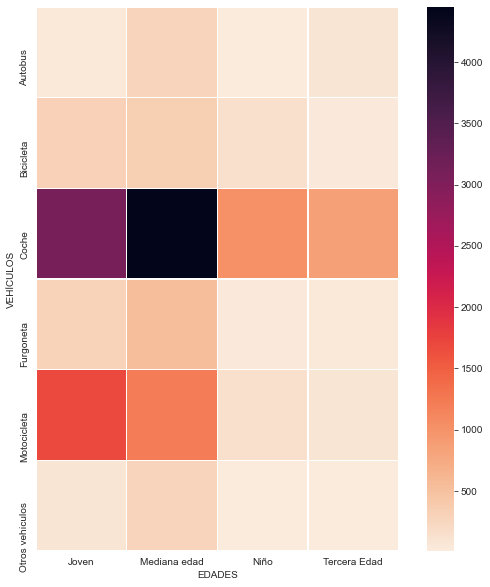

In [223]:
# mapa de calor entre vehículos y edades
data = new_df.groupby(['VEHÍCULOS', 'EDADES']).sum()['columns_1'].unstack() #unstack par quitar el indice jerarquico

plt.figure(figsize=(10,10))
sns.heatmap(data,
            square=True,
            linewidths=.3, cmap = sns.cm.rocket_r);


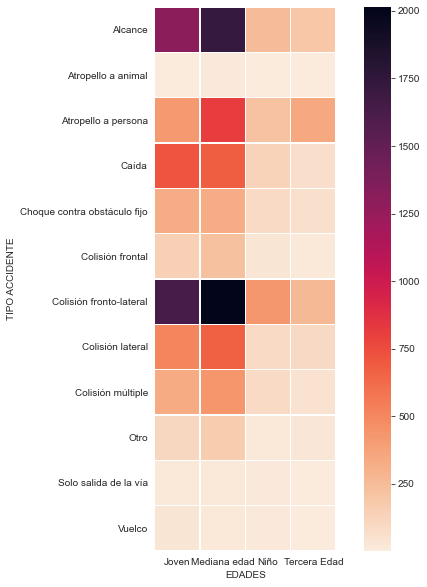

In [211]:
data = new_df.groupby(['TIPO ACCIDENTE', 'EDADES']).sum()['columns_1'].unstack() #unstack par quitar el indice jerarquico

plt.figure(figsize=(10,10))
sns.heatmap(data,
            square=True,
            linewidths=.3, cmap = sns.cm.rocket_r);

In [209]:
#cruce entre edades y tipología del accidente
pd.crosstab(new_df['TIPO ACCIDENTE'],
           new_df['EDADES'],
           margins=False)


EDADES,Joven,Mediana edad,Niño,Tercera Edad
TIPO ACCIDENTE,,,,
Alcance,1301,1727,250,194
Atropello a animal,6,12,1,1
Atropello a persona,423,812,218,350
Caída,722,680,134,68
Choque contra obstáculo fijo,326,326,92,60
Colisión frontal,148,223,40,22
Colisión fronto-lateral,1635,2014,427,264
Colisión lateral,507,676,89,96
Colisión múltiple,334,434,88,53


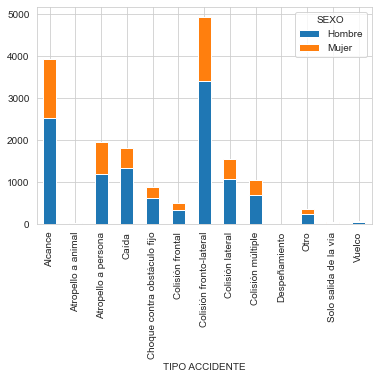

In [202]:
# aqui se representan dentro de las barras los hombres y mujeres con respecto el tipo de accidente
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
df_plot = df5.groupby(['SEXO', 'TIPO ACCIDENTE']).size().reset_index().pivot(columns='SEXO', index='TIPO ACCIDENTE', values=0)
df_plot.plot(kind='bar', stacked=True);


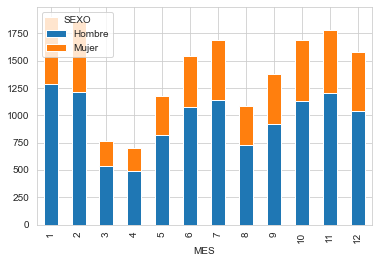

In [203]:
# aqui se representan dentro de las barras los hombres y mujeres con respecto al mes en el que se produjo el accidente
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
df_plot = df5.groupby(['SEXO', 'MES']).size().reset_index().pivot(columns='SEXO', index='MES', values=0)
df_plot.plot(kind='bar', stacked=True);

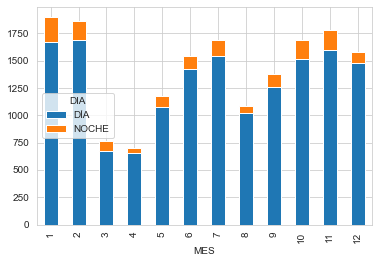

In [204]:
# aqui se representan dentro de las barras si el accidente se produjo de noche o de dia y en el eje x se representan los meses
color_palette("ch:s=.25,rot=-.25", as_cmap=True)
df_plot = df5.groupby(['DIA', 'MES']).size().reset_index().pivot(columns='DIA', index='MES', values=0)
df_plot.plot(kind='bar', stacked=True);

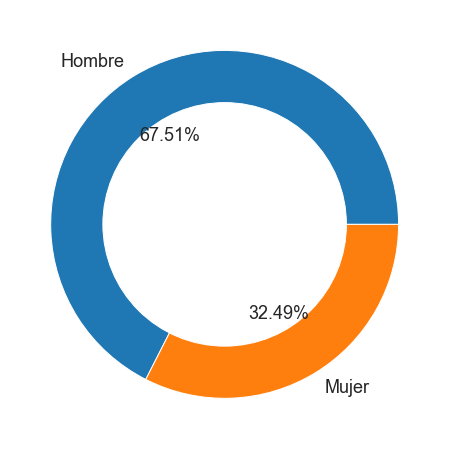

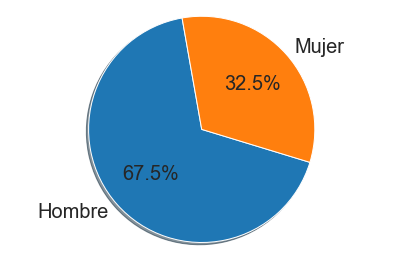

In [265]:
#dos grapicos de tarta para representar el porcentaje de accidentes de los hombres y las mujeres

sex_numero = new_df.groupby(("SEXO")).columns_1.count()
sexo =pd.DataFrame({'Hombres/Mujeres':sex_numero.index, 'Cantidad':sex_numero.values})

# create data
data = new_df.groupby(("SEXO")).columns_1.count()
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.figure(figsize=(8,8))
plt.pie(sex_numero.values,
        labels=sex_numero.index,
        autopct='%3.2f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


plt.rcParams['font.size'] = 20
explode = (0, 0.1, 0, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(new_df.groupby(("SEXO")).columns_1.count(),  labels=sex_numero.index , autopct='%1.1f%%',
        shadow=True, startangle=100)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()
